## Damped Oscillator

In this notebook, we are going to investigate the motion of a **damped oscillator**.

In physics and engineering, damping means loss of mechanical energy to resistive forces such as air drag, friction, etc., so that the amplitude of the oscillator decreases with time.

We will continue with our study on the mass-spring oscillator by adding this extra ingredient - a resistive force. For simplicity, let's assume the resistive force is directly proportional to the velocity, say:

$$ f = - \alpha v $$

where $\alpha$ is a constant depicting the strength of the resistive force, and the minus sign indicates that $f$ acts in the opposite direction to velocity $v$.

The equation of motion for the mass-spring oscillator then reads:

$$ ma = -kx - \alpha v$$

By expressing acceleartion $a$ and velocity $v$ as derivative terms, and introduce constants $\omega^2 = \frac{k}{m}$ and $\beta = \frac{\alpha}{2m}$, then the equation of motion can be rewritten as:

$$ \frac{d^2 x}{dt^2} + 2\beta \frac{d x}{dt} + \omega^2 x = 0$$

Again, we would like to extract information about $x(t)$ from this second-order differential equation.

## Analytical Solution

The analytical solution of the equation is somewhat mathematically involved. You can skip this section if you are not interested. Here I only list some of the major results. A more detailed treatment can be found in the following link: [[https://zhuanlan.zhihu.com/p/134176474]](https://zhuanlan.zhihu.com/p/134176474).

Depending on the relative magnitude of $\beta$ and $\omega$, the behaviour of the oscillation can be sorted into three types:

- lightly damped ($\beta < \omega$)
- heavily damped ($\beta > \omega$)
- critically damped (($\beta = \omega$))

#### Light damping

When $\beta < \omega$, the solution of the equation of motion takes the form:

$$ x(t) = A e^{-\beta t} \sin(\omega't + \phi) \qquad \text{with } \omega' = \sqrt{\omega^2 - \beta^2}$$

This shows an oscillatory motion with an exponentially decaying amplitude with time.

#### Heavy damping

When $\beta > \omega$, the solution of the equation of motion takes the form:

$$ x(t) = A_1 e^{-\gamma_+ t} + A_2 e^{-\gamma_- t} \qquad \text{with } \gamma_\pm = \beta \pm \sqrt{\beta^2 - \omega^2}$$

This is the sum of two exponential decay curves. This implies that when the resistive forces are too strong, then the block is no longer able to oscillate any more. The only thing it can do is to slowly return to its equilibrium position from one side.

#### Critical damping

This is an interesing situation where $\beta = \omega$. The solution of the equation becomes:

$$ x(t) = (A+Bt) e^{-\beta t}$$

When the curve is plotted, one would notice that the shape of the graph looks very much the same as an exponential decay curve despite some discrepencies near small values of $t$. One might also notice that the rate that the curve tends to zero is faster than the heavy damping case. In fact, a critically-damped oscillator can return to its equilibrium position in the shortest time without overshooting.

## Numerical Solutions

We are going to trust our numerical methods developed so far and confidently apply them to the equation for the damped oscillator.

To recap, we have learned three numerical methods:

- The Euler method
- The mid-point method
- The Finite Difference method

In the following code blocks, we pack the three algorighms to our problem into three Python functions, after which we plot the solutions from all of these three schemes on one diagram, so that we can make comparisons.

In [1]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# initialize independent variable t
# you may change the grid scales and spacings and see what happens!
t_min = 0
t_max = 4
n = 500
dt = (t_max - t_min)/n

t = np.linspace(t_min, t_max, n)

In [3]:
# numerical solution with the Euler method
def damped_euler(beta, omega, x0, v0):
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    
    # imposing initial conditions
    x[0] = x0
    v[0] = v0
    
    for i in range(1, len(x)):
        a = - omega** 2 * x[i-1] - 2 * beta * v[i-1]
        v[i] = v[i-1] + a * dt
        x[i] = x[i-1] + v[i-1] * dt
    
    return x

In [4]:
# numerical solution with the mid-point method
def damped_midpt(beta, omega, x0, v0):
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    
    # imposing initial conditions
    x[0] = x0
    v[0] = v0

    for i in range(1, len(x)):
        a = - omega** 2 * x[i-1] - 2 * beta * v[i-1]
        v_mid = v[i-1] + a * dt/2
        x_mid = x[i-1] + v[i-1] * dt/2
        a_mid = - omega**2 * x_mid - 2 * beta * v_mid
        v[i] = v[i-1] + a_mid * dt
        x[i] = x[i-1] + v_mid * dt

    return x

In [5]:
# numerical solution with the finite diferrence method
# admittedly, this is actually a mix of finite difference and mid-point method
def damped_fdtd(beta, omega, x0, v0):
    x = np.zeros_like(t)
    
    # imposing initial conditions
    x[0] = x0
    # sneak in the result from mid-point method
    a0 = - omega** 2 * x0 - 2 * beta * v0
    v_mid = v0 + a0 * dt/2
    x_mid = x0 + v0 * dt/2
    a_mid = - omega**2 * x_mid - 2 * beta * v_mid
    x[1] = x0 + v_mid * dt
    
    for i in range(2, len(x)):
        dxdt = (x[i-1] - x[i-2])/dt
        a = -omega**2 * x[i-1] - 2 * beta * dxdt
        x[i] = a * dt**2 + 2 * x[i-1] - x[i-2]
        
        # the codes below refines the result for x[i]
        # with x[i] evaluated, one can re-calculate a more accurate result for dx/dt at x[i-1]
        # then it is possible to refine the result for acceleration a at x[i-1]
        # hence an improved result when extrapolating x[i]
        # you can comment out the three lines below and see the difference
        
        dxdt = (x[i] - x[i-2])/(2*dt)
        a = -omega**2 * x[i-1] - 2 * beta * dxdt
        x[i] = a * dt**2 + 2 * x[i-1] - x[i-2]
        
    return x

In [6]:
# plot solutions from three methods on one diagram
def plot_solutions(beta, omega, x0, v0):
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.plot(t, damped_euler(beta, omega, x0, v0), color='red', label='Euler')
    plt.plot(t, damped_fdtd(beta, omega, x0, v0), color='green', label='FDTD')
    plt.plot(t, damped_midpt(beta, omega, x0, v0), color='blue', label='Mid-point')
    plt.title(r'$\beta$ = ' + str(beta) + r', $\omega$ = ' + str(omega))
    plt.ylabel('displacement $x$ (cm)')
    plt.xlabel('time $t$ (s)')
    plt.legend()
    plt.show()

Now we are ready for the physics pictures.

For simplicity, I will fix the value of $\omega = 10$ (in radians per second). Let's see how things will play out for different values of $\beta$, corresponding to different relative strenghs of the resistance.

I will take the same initial conditions: $x(0) = 10 \text{ cm}$ and $v(0) = 0$. Physically, this represents an oscillator displaced by some distance and released from rest.

You can change these parameters later and see what the consequences are.

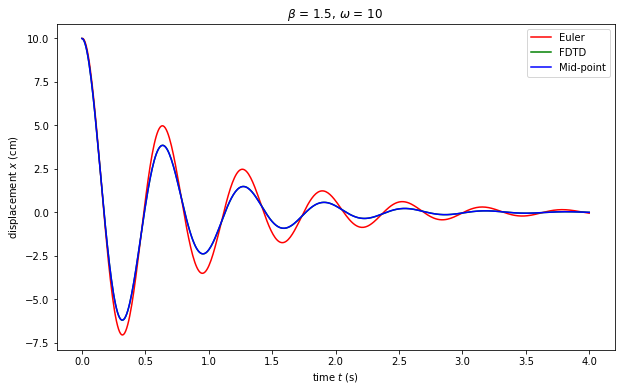

In [14]:
# plot the solutions
# format: plot_solutions(beta, omega, x0, v0)
plot_solutions(1.5, 10, 10, 0)

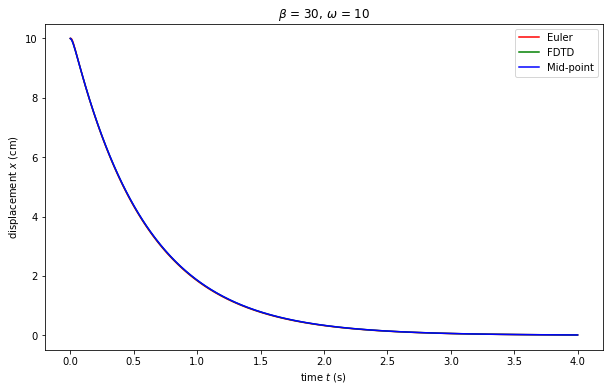

In [8]:
plot_solutions(30, 10, 10, 0)

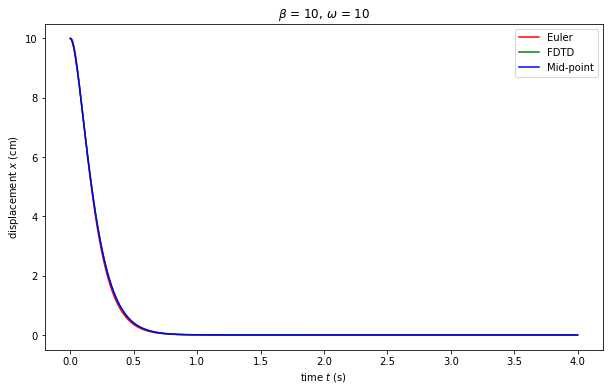

In [9]:
plot_solutions(10, 10, 10, 0)

A better way to look at the effect of $\beta$ is to compare the graphs of a series of different $\beta$'s on the same plot. Let's set up another Python function for this purpose.

For the implementation, we have seen that the mid-point method and finite difference method are more trustworthy. Ｉ will use the mid-point method in the following codes, you are welcome to modify the codes.

In [10]:
# plot solutions for different beta's
def compare_beta(omega, x0, v0):
    for ratio in [0, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0, 1.6, 3, 6, 10]:
        beta = ratio * omega
        plt.plot(t, damped_midpt(beta, omega, x0, v0), label=r'$\beta = $' + str(beta))
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.ylabel('displacement $x$ (cm)')
    plt.xlabel('time $t$ (s)')
    plt.title('$\omega$ = ' + str(omega))
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

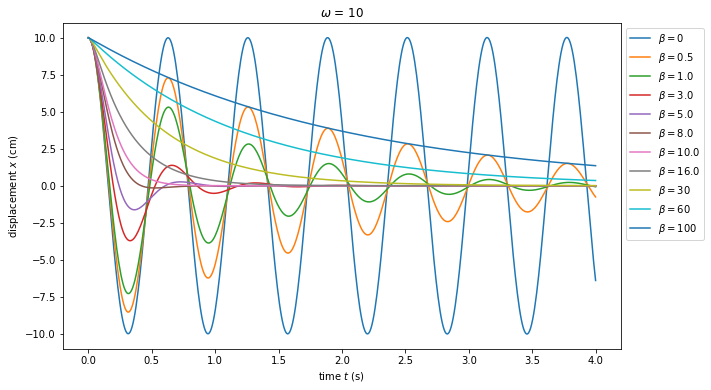

In [11]:
compare_beta(10,10, 0)

Can you tell which of these are lightly-damped? Heavily damped? Critically-damped?

## Exercises

1. Change the range of the independent variable $t$ and the number of grid points $n$, rerun the codes and see how does that affect the precision of the numerical solutions?

2. Change the initial conditions for $x(0)$ and $v(0)$. Rerun the codes for the solutions. What are your observations?

3. Walk through the codes for the numerical solution by the Euler method and the mid-point method. Make sure you can read and understand them.

## Mini Project - Forced Oscillation

In the notebook, we simulated a mass-spring oscillator under the action of a resistive force. We can generalise the numerical methods to study more complicated oscillators. In this project, let's take an oscillator that is driven by an external force $F_\text{ext}$.

Let's say this force is periodic with time as:
$$ F_\text{ext} = F_0 \sin(\Omega t)$$

where $\Omega$ is the frequency of the external force, which can be as high/low as you wish. The equation of motion now becomes:

$$ ma = -kx - \alpha v + F_0 \sin(\Omega t)$$

or

$$ \frac{d^2 x}{dt^2} + 2\beta \frac{d x}{dt} + \omega^2 x = f_0 \sin(\Omega t)$$

with $\omega = \sqrt{\frac{k}{m}}$ being the natural frequency of the oscillator, $\beta = \frac{\alpha}{2m}$ as before, and $f_0 = \frac{F_0}{m}$ introduced as a measure of the strength of the driving force.

A mathematical treatment for this equation can be found here: [[https://zhuanlan.zhihu.com/p/135856012]](https://zhuanlan.zhihu.com/p/135856012)

Your task is to implement the mid-point method to find the numerical solution for the oscillator.

#### Useful hints:
 - you may need to use the sine function from the numpy library: `np.sin()`
 - to call the i-th item from a Python list, you can use the syntax: `list_name[i]`

In [20]:
# initialize independent variable t
t_min = 0
t_max = 12
n = 600
dt = (t_max - t_min)/n

t = np.linspace(t_min, t_max, n)

In [21]:
# numerical solution with the mid-point method
def forced_midpt(beta, omega, f0, Omega, x0, v0):
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    
    x[0] = x0
    v[0] = v0

    for i in range(1, len(x)):
        # Write your codes to generate the numerical solution here:
        a = - omega** 2 * x[i-1] - 2 * beta * v[i-1] + f0 * np.sin(Omega * t[i-1])
        v_mid = v[i-1] + a * dt/2
        x_mid = x[i-1] + v[i-1] * dt/2
        t_mid = (t[i] + t[i-1])/2
        a_mid = - omega**2 * x_mid - 2 * beta * v_mid + f0 * np.sin(Omega * t_mid)
        v[i] = v[i-1] + a_mid * dt
        x[i] = x[i-1] + v_mid * dt
        
    return x

In [22]:
# plot the motion of the forced oscillator
def plot_forced(beta, omega, f0, Omega, x0, v0):
    print(f'Parameters: f0 = {f0}, beta = {beta}, omega = {omega}, Omega = {Omega}')
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.plot(t, forced_midpt(beta, omega, f0, Omega, x0, v0))
    plt.title(r'Forced Oscillation')
    plt.ylabel('displacement $x$ (cm)')
    plt.xlabel('time $t$ (s)')
    plt.show()

Parameters: f0 = 30, beta = 2, omega = 7, Omega = 14


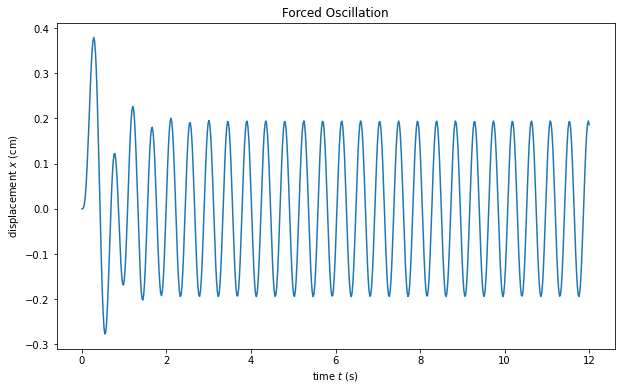

In [26]:
# format: plot_forced(beta, omega, f0, Omega, x0, v0)
# change the parameters and check out the results!
plot_forced(2, 7, 30, 14, 0, 0)

Parameters: f0 = 20, beta = 0, omega = 10, Omega = 4


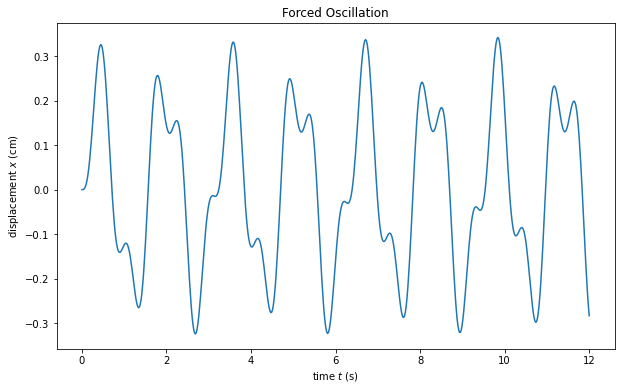

In [19]:
plot_forced(0, 10, 20, 4, 0, 0)

It is even more interesting to see how the driving frequency $\Omega$ affects the amplitude of the oscillation for fixed $\beta$, $\omega$ and $f_0$.

If your codes for the numerical solution for the forced oscillator are correctly implemented, then the following code should generate a graph of amplitude against driving frequency.

N.B. In case the oscillator has a large non-zero displacement or velocity, the oscillator may reach large displacements near the start of the motion. But this is not what we mean by the amplitude response to the driving force. We need to wait for oscillator to settle down to its stable state under the driving force. So maxima of the displacement is found for larger values of time $t$.

In [27]:
# plot the driving response
def driving_response(beta, omega, f0, x0, v0):
    ratio = np.linspace(0.1, 3, 100)
    Amp = np.zeros_like(ratio)
    
    for i in range(len(Amp)):
        x = forced_midpt(beta, omega, f0, ratio[i]*omega, x0, v0)
        Amp[i] = max(x[int(len(x)/2):])
    
    print(f'Parameters: f0 = {f0}, beta = {beta}, omega = {omega}')
    
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.plot(ratio, Amp)
    plt.title(r'Forced Oscillation')
    plt.ylabel('Amplitude $A$ (cm)')
    plt.xlabel('$\Omega/\omega$')
    plt.show()

Parameters: f0 = 20, beta = 2, omega = 10


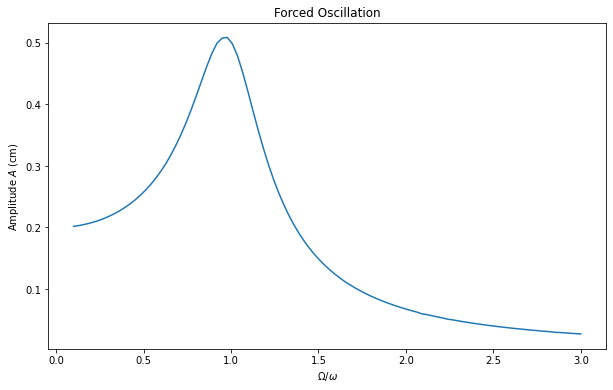

In [28]:
# format: driving_response(beta, omega, f0, x0, v0)
# change the parameters and check out the results!
driving_response(2, 10, 20, 0, 0)

If everything works out well, you shall be able to see that the amplitude of the oscillator is relatively small when the driving frequency is significantly lower than the natural frequency of the mass-spring system. The amplitude is similarly small for very high driving frequencies. However, at a particular driving frequency, the amplitude response of the oscillator becomes huge! This phenomenon is known as **resonance**.

It also happens that the resonant amplitude increases as you reduces the strength of resistance. For very small resistive forces, resonance occurs at near the natural frequency $\omega$ and the resonant peak becomes very high and very sharp. In particular, one can show that under the limit of $\beta \to 0$, the amplitude at resonance tends to infinite.